In [1]:
import numpy as np
import pandas as pd


#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Scipy
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import zscore
from operator import itemgetter

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

# DataSet Balancing
from imblearn.over_sampling import SMOTE

# prettytable
from prettytable import PrettyTable

#pickle
import pickle

In [2]:
cardio_data = pd.read_csv('cvd.csv')
cardio_data.head()
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [3]:
print('Number of Rows: ',cardio_data.shape[0])
print('Number of Columns: ',cardio_data.shape[1])
num_of_entries = cardio_data.shape[0]*cardio_data.shape[1]
print('Number of entries in dataFrame: ',num_of_entries)

num_of_missing_values = cardio_data.isna().sum().sum()
print('Number of missing values: ',num_of_missing_values)

cardio_data=cardio_data.drop_duplicates()
cardio_data.describe()

Number of Rows:  4240
Number of Columns:  16
Number of entries in dataFrame:  67840
Number of missing values:  645


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.125236
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.331025
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
cardio_data.rename(columns={'male':'gender','currentSmoker':'smoking','cigsPerDay':'cigarettes/day','BPMeds':'BP_meds',
                   'prevalentStroke':'stroke','prevalentHyp':'hypertensive',
                   'totChol':'cholesterol','sysBP':'ap_hi','diaBP':'ap_lo',
                   'heartRate':'HR','TenYearCHD':'cardio'},
          inplace = True)
cardio_data.head()

,gender,age,education,smoking,cigarettes/day,BP_meds,stroke,hypertensive,diabetes,cholesterol,ap_hi,ap_lo,BMI,HR,glucose,cardio
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1


In [5]:
for i in cardio_data.columns.tolist():
  print("Total missing values in",i,":",cardio_data[i].isna().sum())
cardio_data.dropna(subset=['education','cigarettes/day','BP_meds','cholesterol','BMI','HR','glucose'],inplace= True)
cardio_data.shape

Total missing values in gender : 0
Total missing values in age : 0
Total missing values in education : 105
Total missing values in smoking : 0
Total missing values in cigarettes/day : 29
Total missing values in BP_meds : 53
Total missing values in stroke : 0
Total missing values in hypertensive : 0
Total missing values in diabetes : 0
Total missing values in cholesterol : 50
Total missing values in ap_hi : 0
Total missing values in ap_lo : 0
Total missing values in BMI : 19
Total missing values in HR : 1


Total missing values in glucose : 388
Total missing values in cardio : 0


(3658, 16)

In [6]:
outliers = len(cardio_data[(cardio_data["ap_hi"]>=280) | (cardio_data["ap_lo"]>=220) | (cardio_data["ap_lo"] < 0) | 
                           (cardio_data["ap_hi"] < 0) | (cardio_data["ap_hi"]<cardio_data["ap_lo"])])
print(f'we have total {outliers} outliers')
print(f'percent missing: {round(outliers/len(cardio_data)*100,1)}%')
cardio_data = cardio_data[ (cardio_data['ap_lo'] >= 0) & (cardio_data['ap_hi'] >= 0) ]
cardio_data = cardio_data[ (cardio_data['ap_lo'] <= 220) & (cardio_data['ap_hi'] <= 280) ]
cardio_data = cardio_data[ (cardio_data['ap_lo'] < cardio_data['ap_hi']) ]

we have total 1 outliers
percent missing: 0.0%


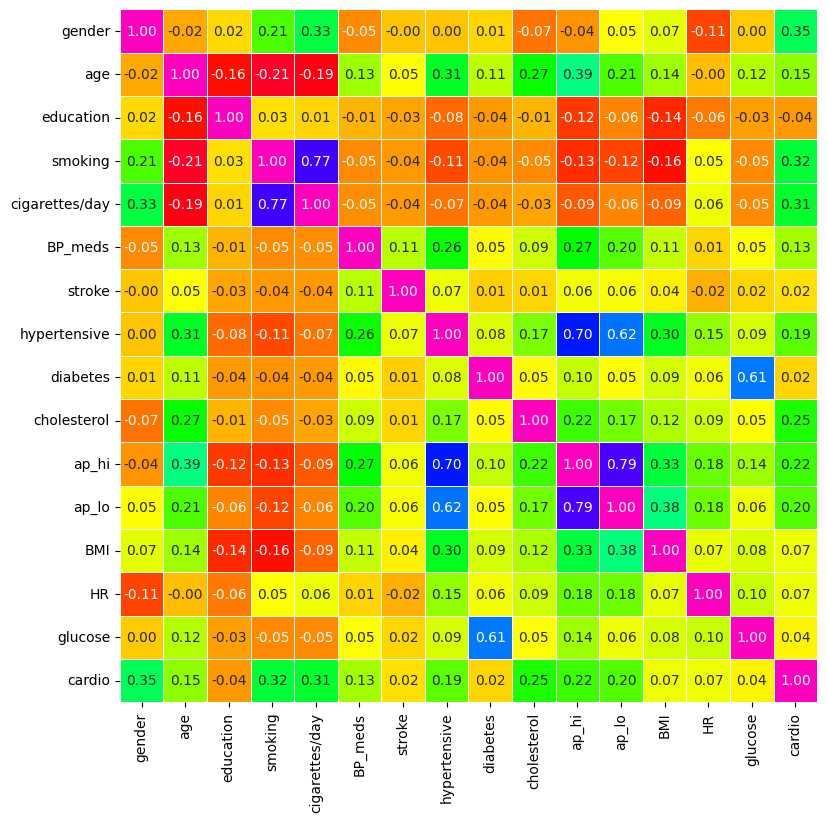

In [7]:
#correlation
f, ax = plt.subplots(figsize=(9, 9))
# plt.title("pearson")
sns.heatmap(cardio_data.corr(),linewidths=.5,annot=True,ax=ax,cbar=False,fmt='.2f',cmap='gist_rainbow')
# plt.savefig('pearson.png')
plt.show()

In [8]:
#applying the train_and_test split method
dataset=cardio_data.copy()
Y = dataset['cardio'].values
X = dataset.drop(['cardio','cholesterol','BP_meds','education','diabetes','cigarettes/day'],axis=1).values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
df = pd.DataFrame(y_train,columns=['cardio'])
df['cardio'].groupby(df['cardio']).count()

cardio
0    2547
1     378
Name: cardio, dtype: int64

In [9]:
smote = SMOTE(random_state = 42)
x_train_sm, y_train_sm = smote.fit_resample(X, Y)
df = pd.DataFrame(y_train_sm,columns=['cardio'])
df['cardio'].groupby(df['cardio']).count()

cardio
0    3184
1    3184
Name: cardio, dtype: int64

Accuracy of Logistic Regression: 83.87978142076503
Confusion matrix of Logistic Regresssion model:


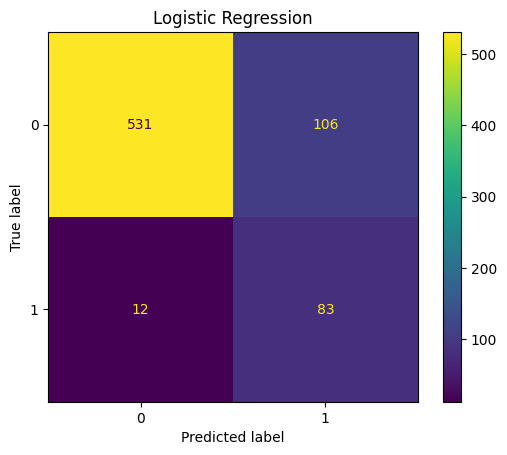

In [10]:
#logistic regression
clf=LogisticRegression(solver='newton-cg').fit(x_train_sm,y_train_sm)
prediction = clf.predict(x_test)
print('Accuracy of Logistic Regression:',accuracy_score(y_test,prediction)*100)
cm = confusion_matrix(y_test,prediction)
print('Confusion matrix of Logistic Regresssion model:')
# ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lgr.classes_).plot()
ConfusionMatrixDisplay.from_predictions(y_test,prediction)
plt.title('Logistic Regression')
plt.show()

Accuracy of Gradient Boosting Classifier: 92.4863387978142
Confusion matrix of Gradient Boosting classifier model:


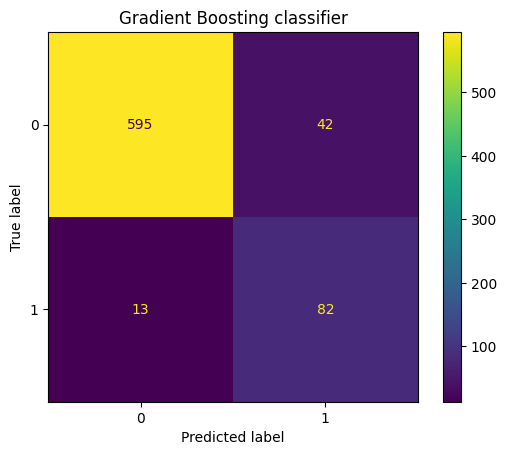

In [11]:
#gradient boosting
gbc=GradientBoostingClassifier().fit(x_train_sm,y_train_sm)
pred=gbc.predict(x_test)
print('Accuracy of Gradient Boosting Classifier:',accuracy_score(y_test,gbc.predict(x_test))*100)
print('Confusion matrix of Gradient Boosting classifier model:')
ConfusionMatrixDisplay.from_predictions(y_test,pred)
plt.title('Gradient Boosting classifier')
plt.show()

Accuracy of Random Forrest Classifier: 100.0
Confusion matrix of Random Forest Classifier model:


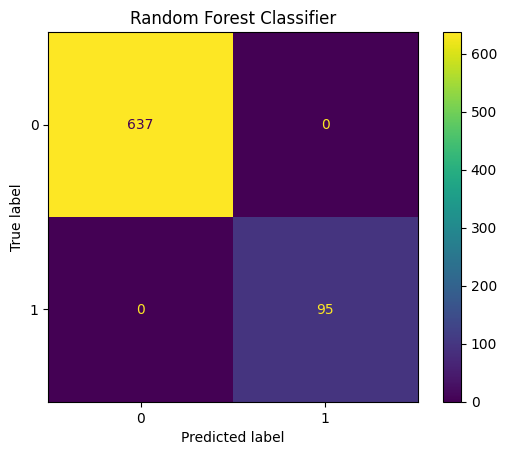

In [12]:
#random forest classifier
rfc = RandomForestClassifier().fit(x_train_sm,y_train_sm)
print('Accuracy of Random Forrest Classifier:',accuracy_score(y_test,rfc.predict(x_test))*100)
print('Confusion matrix of Random Forest Classifier model:')
ConfusionMatrixDisplay.from_predictions(y_test,rfc.predict(x_test))
plt.title('Random Forest Classifier')
plt.show()

Accuracy of Decision Tree Classifier: 100.0
Confusion matrix of Decision Tree Classifier model:


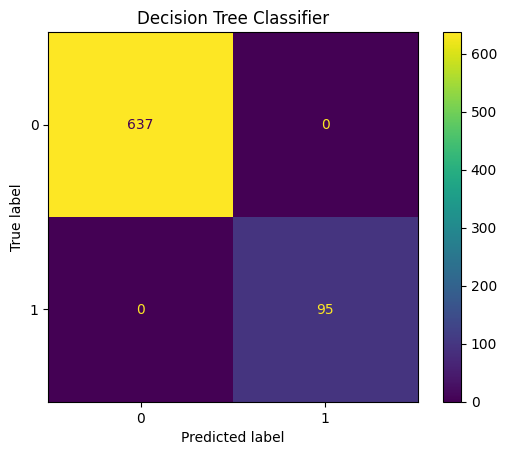

In [13]:
#decision tree classifier
dtc = DecisionTreeClassifier().fit(x_train_sm,y_train_sm)
print('Accuracy of Decision Tree Classifier:',accuracy_score(y_test,dtc.predict(x_test))*100)
print('Confusion matrix of Decision Tree Classifier model:')
ConfusionMatrixDisplay.from_predictions(y_test,dtc.predict(x_test))
plt.title('Decision Tree Classifier')
plt.show()

Accuracy of support vector machine: 66.93989071038251
Confusion matrix of support vector machine model:


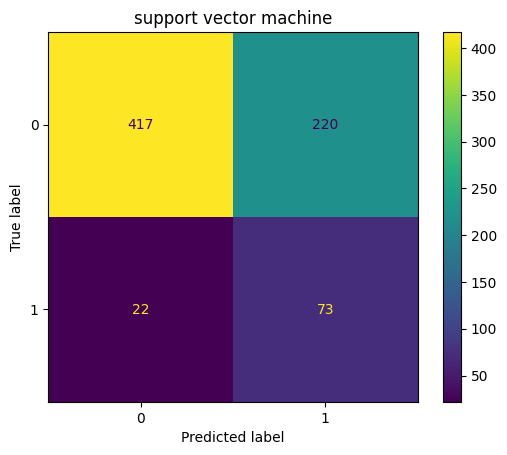

In [14]:
#support vector machine
svm_ = SVC(probability=True).fit(x_train_sm,y_train_sm)
print('Accuracy of support vector machine:',accuracy_score(y_test,svm_.predict(x_test))*100)
print('Confusion matrix of support vector machine model:')
ConfusionMatrixDisplay.from_predictions(y_test,svm_.predict(x_test))
plt.title('support vector machine')
plt.show()

Accuracy of knn: 100.0
Confusion matrix of knn model:


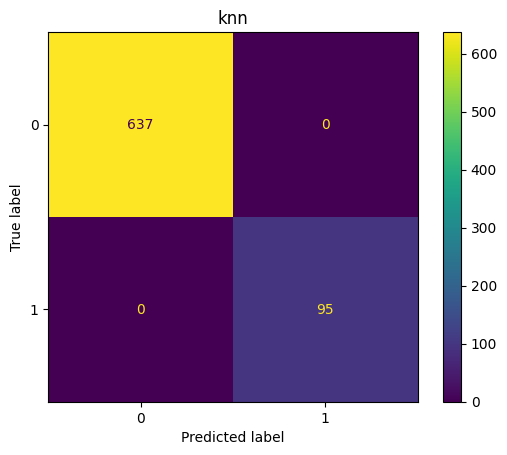

In [15]:
#k-nearest neighbour classifier
from sklearn.model_selection import GridSearchCV
KNN_clf = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,10)}
cv_knn = GridSearchCV(KNN_clf, cv = 5, param_grid = parameters)
cv_knn.fit(x_train_sm, y_train_sm)
cv_knn.best_estimator_
print('Accuracy of knn:',accuracy_score(y_test,cv_knn.predict(x_test))*100)
print('Confusion matrix of knn model:')
ConfusionMatrixDisplay.from_predictions(y_test,cv_knn.predict(x_test))
plt.title('knn')
plt.show()

In [16]:
from prettytable import PrettyTable

table = PrettyTable(['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic Regression', '0.840164' ,'0.441489' ,'0.873684' ,'0.586572'])
table.add_row(['Gradient Boosting Classifier' ,'0.918033', '0.625899', '0.915789', '0.743590'])
table.add_row(['Random Forest Classifier' ,'1.000000' ,'1.000000' ,'1.000000' ,'1.000000'])
table.add_row(['Decision Tree Classifier',  '1.000000',  '1.000000',  '1.000000', '1.000000'])
table.add_row(['Support Vector Machine' ,'0.867486' ,'0.494048' ,'0.873684','0.631179'])
table.add_row(['K-Nearest Neighbors', '0.998634'  ,'1.000000' ,'0.989474' ,'0.994709'])
print(table)

+------------------------------+----------+-----------+----------+----------+
|            Model             | Accuracy | Precision |  Recall  | F1_score |
+------------------------------+----------+-----------+----------+----------+
|     Logistic Regression      | 0.840164 |  0.441489 | 0.873684 | 0.586572 |
| Gradient Boosting Classifier | 0.918033 |  0.625899 | 0.915789 | 0.743590 |
|   Random Forest Classifier   | 1.000000 |  1.000000 | 1.000000 | 1.000000 |
|   Decision Tree Classifier   | 1.000000 |  1.000000 | 1.000000 | 1.000000 |
|    Support Vector Machine    | 0.867486 |  0.494048 | 0.873684 | 0.631179 |
|     K-Nearest Neighbors      | 0.998634 |  1.000000 | 0.989474 | 0.994709 |
+------------------------------+----------+-----------+----------+----------+


In [17]:
import pickle
pickle.dump(rfc,open('cardiac_arrest_prediction_model.pkl','wb'))

In [18]:
model = pickle.load(open('cardiac_arrest_prediction_model.pkl','rb'))
#gender,age, smoking,stroke,hypertension,ap_hi,ap_lo,bmi,hr,glucose.
model.predict([[1,39,0,0,0,106,70,26.97,80,77]])

array([0])